debruitage des images 

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import scipy as sp
# from general import * #numerical tools 
# from mysignal import *

# **1.debruitage des images**

Soit une image en niveau de gris de votre choix, appelée i (par exemple Lena 512x512 pixels). Bruiter cette
image par un bruit Gaussien additif, dont la puissance est fixée afin d'obtenir un rapport signal sur bruit de
20 dB. L'image résultante sera appelée ib.

In [ ]:
im = cv2.imread("lenna.tif")
img = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im_vec = np.ravel(img)
SNR = 10
mu = im_vec ** 2.

P_i = np.sum(mu) / (img.shape[0] * img.shape[1])
# print(mu[2],im_vec[2])

Pb = P_i / (10 ** (SNR / 10))
b = np.sqrt(Pb) * np.random.randn(img.shape[0], img.shape[1])
img_b = img + b


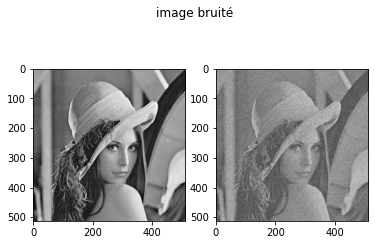

float64


In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.suptitle('image bruité')
ax1.imshow(img,cmap="gray")
ax2.imshow(img_b,cmap="gray")
plt.show()
print(img_b.dtype)

## 1.1filtre bilateral

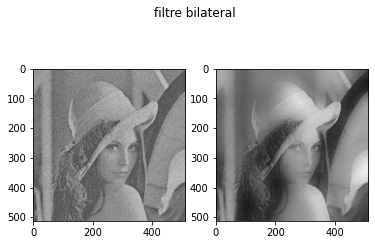

In [ ]:
img_b = np.float32(img_b)
bilateral_fil = cv2.bilateralFilter(img_b, 80, 80, 100)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('filtre bilateral')
ax1.imshow(img_b,cmap="gray")
ax2.imshow(bilateral_fil,cmap="gray")


## 1.2 filtre gaussienne

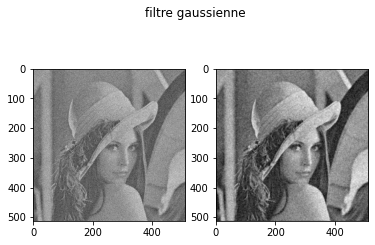

In [ ]:
gaussian_fil = cv2.GaussianBlur(img_b, (5, 5), 0, borderType=cv2.BORDER_CONSTANT)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('filtre gaussienne')
ax1.imshow(img_b,cmap="gray")
ax2.imshow(gaussian_fil,cmap="gray")

### 1.3 Seuillage dur et doux dans le domaine des ondelettes

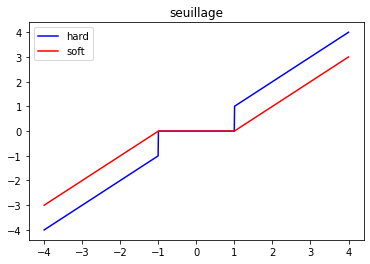

In [ ]:
T = 1  # threshold value
v = np.linspace(-4, 4, 1024)
v_hard = v * (np.abs(v) > T)
v_soft = v * np.maximum(1 - T / np.abs(v), np.zeros(1024, ))
plt.figure()
plt.plot(v, v_hard, 'b', label="hard")
plt.plot(v, v_soft, 'r', label="soft")
plt.legend()
plt.title('seuillage')
plt.show()

 *1.3.1 1ere methode*

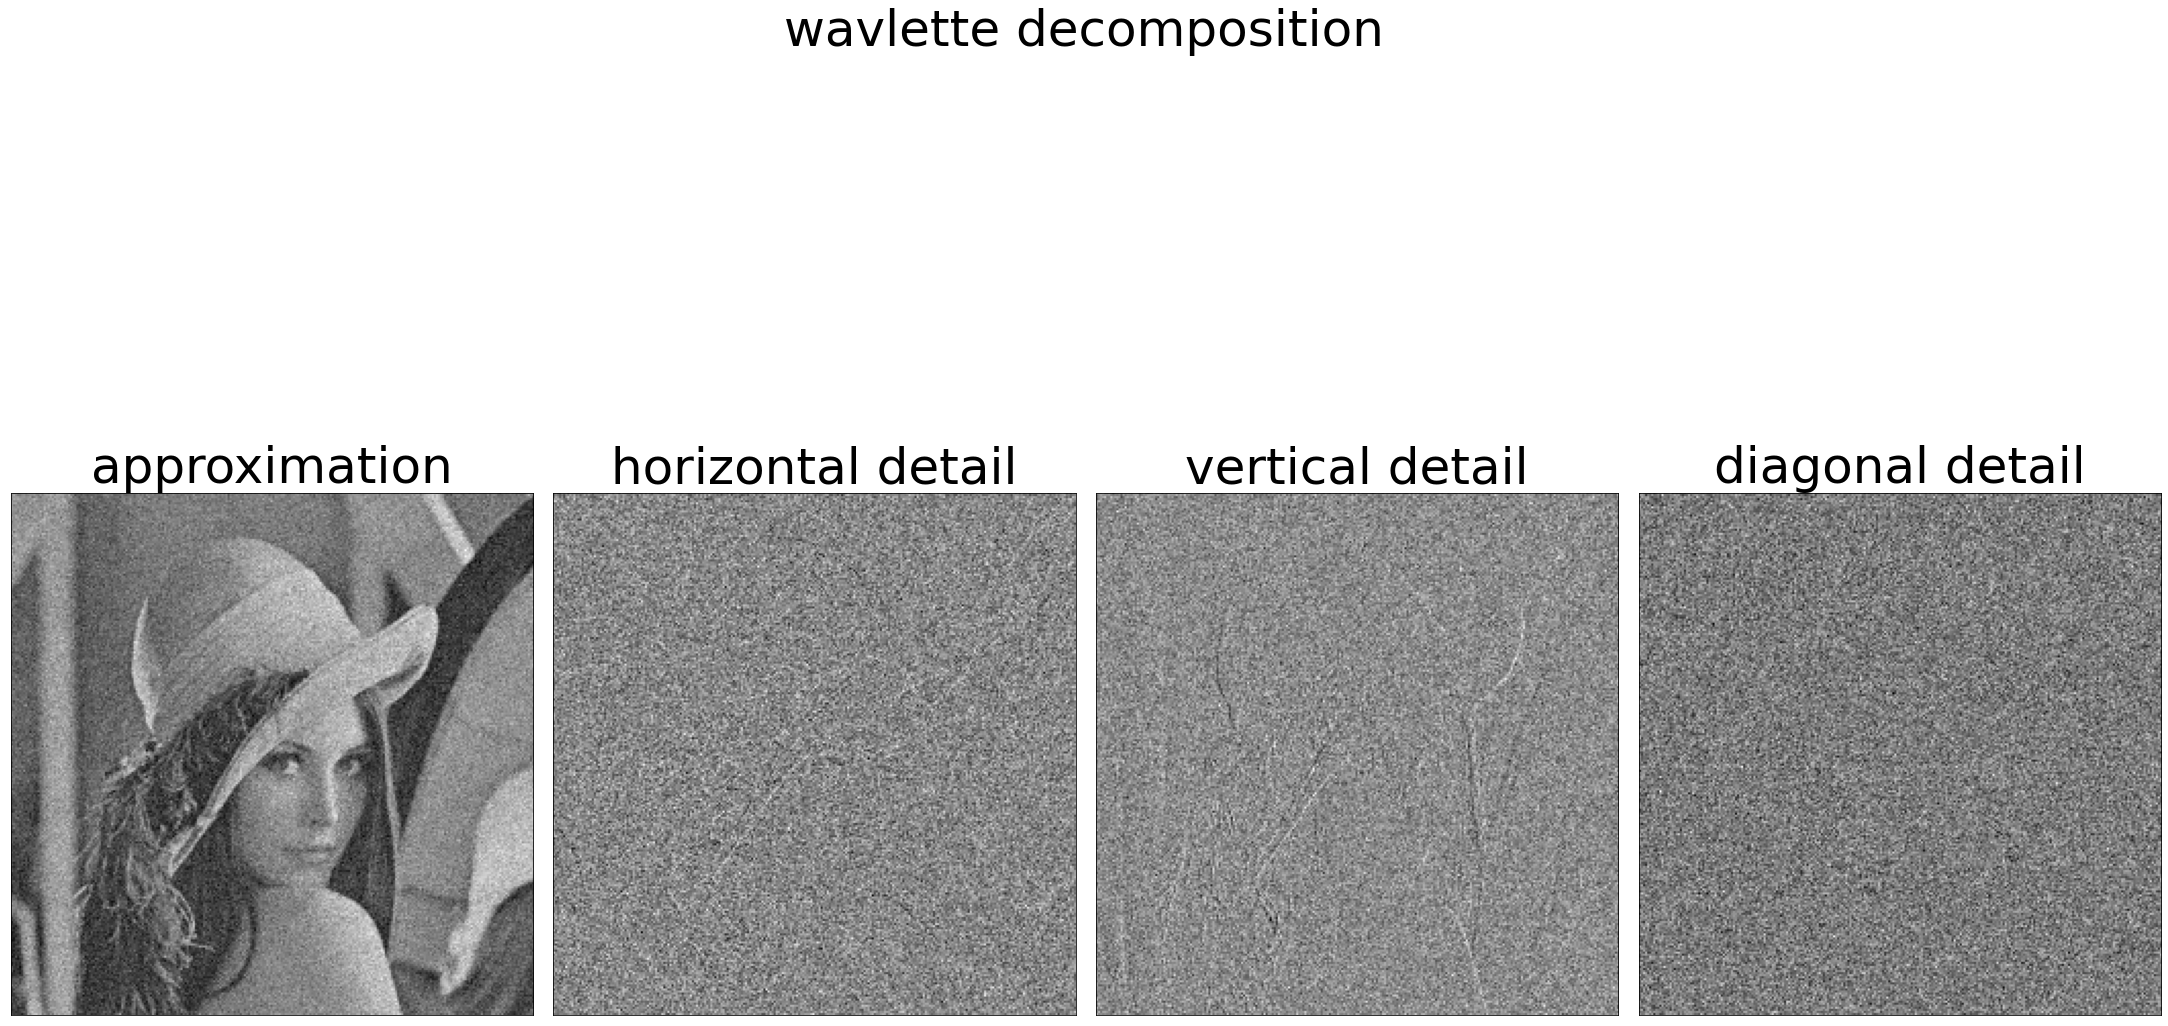

In [ ]:
ca, (ch, cv, cd)=pywt.dwt2(img_b,'haar')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,figsize=(30,20),constrained_layout=True)

fig.suptitle('wavlette decomposition',fontsize = 50)
ax1.set_xticks(list())
ax1.set_yticks(list())
ax1.imshow(ca,cmap="gray")
ax1.set_title('approximation',fontsize = 50)
ax2.set_xticks(list())
ax2.set_yticks(list())
ax2.set_title('horizontal detail',fontsize = 50)
ax2.imshow(ch,cmap="gray")
ax3.set_xticks(list())
ax3.set_yticks(list())
ax3.set_title('vertical detail',fontsize = 50)
ax3.imshow(cv,cmap="gray")
ax4.set_xticks(list())
ax4.set_yticks(list())
ax4.set_title('diagonal detail',fontsize =50)
ax4.imshow(cd,cmap="gray")

**1.3.1 seuillage hard**

In [ ]:
T = 2 *ch.std()

**1.3.1 seuillage soft**

In [ ]:
ch = np.multiply(ch,abs(ch) > T)
cv = np.multiply(cv,abs(cv) > T)
cd = np.multiply(cd,abs(cd) > T)

ca2, (ch2, cv2, cd2)=pywt.dwt2(ca,'haar')

ch2 = np.multiply(ch2,abs(ch2) > T)
cv2 = np.multiply(cv2,abs(cv2) > T)
cd2 = np.multiply(cd2,abs(cd2) > T)

ca3, (ch3, cv3, cd3)=pywt.dwt2(ca2,'haar')

ch3 = np.multiply(ch3,abs(ch3) > T)
cv3 = np.multiply(cv3,abs(cv3) > T)
cd3 = np.multiply(cd3,abs(cd3) > T)

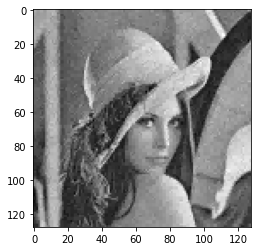

In [ ]:
reconst = pywt.idwt2((ca3,(ch3,cv3,cd3)),"haar")
plt.imshow(reconst, cmap='gray')

 *1.3.2 2eme methode*

**1.3.2.1 seuillage hard**

In [ ]:
def thresh_hard(u,t):return u*(abs(u)>t)

In [ ]:
h = [0, .482962913145, .836516303738, .224143868042, -.129409522551]
h = h/np.linalg.norm(h)
Jmin = 2


In [ ]:
a = perform_wavortho_transf(img_b,Jmin,+1,h)

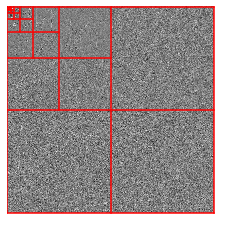

In [ ]:
plot_wavelet(a,Jmin);

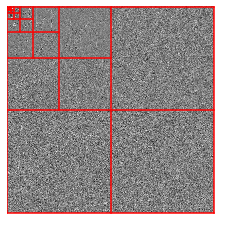

In [ ]:
T = 3*sigma
aT = thresh_hard(a,T)
plot_wavelet(aT,Jmin);

In [ ]:
fHard = perform_wavortho_transf(aT,Jmin,-1,h)

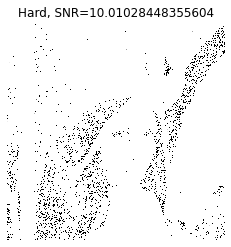

In [ ]:
imageplot(clamp(fHard), 'Hard, SNR=' + str(snr(img,fHard)) )


## 1.3 Filtrage moyen non local

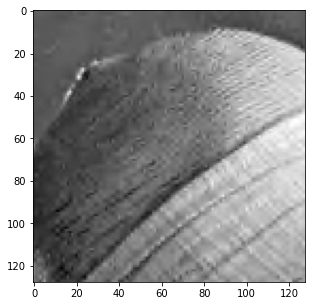

In [ ]:
c = [100,200]
n=128
f0 = rescale(img[c[0]-n//2:c[0]+n//2, c[1]-n//2:c[1]+n//2])
plt.figure(figsize = (5,5))
plt.imshow(f0,cmap='gray')

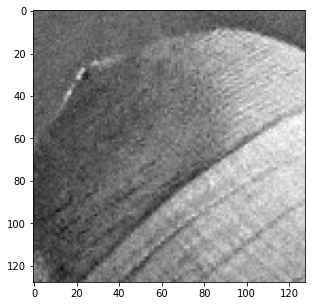

In [ ]:
sigma = .04
f = f0 + sigma*np.random.standard_normal((n,n))
plt.figure(figsize = (5,5))
plt.imshow(f,cmap='gray')

We denote w to be the half width of the patches, and w1=2w+1 the full width.

In [ ]:
w = 3
w1 = 2*w + 1


We set up large (n,n,w1,w1) matrices to index the the X and Y position of the pixel to extract.

Location of pixels to extract.

In [ ]:
[X,Y,dX,dY] = np.meshgrid(np.arange(1,n+1),np.arange(1,n+1),np.arange(-w,w+1),np.arange(-w,w+1))
X = X + dX
Y = Y + dY

We handle boundary condition by reflexion

In [ ]:
X[X < 1] = 2-X[X < 1] 
Y[Y < 1] = 2-Y[Y < 1]
X[X > n] = 2*n-X[X > n]
Y[Y > n] = 2*n-Y[Y > n]

Patch extractor operator.

In [ ]:
I = (X-1) + (Y-1)*n
for i in range(n//w):
    for j in range(n//w):
        I[i,j] = np.transpose(I[i,j])
        
patch = lambda f: np.ravel(f)[I]

Define the patch matrix P of size (n,n,w1,w1). Each P(i,j,:,:) represent an (w1,w1) patch extracted around pixel (i,j) in the image.

In [ ]:
P = patch(f)

Display some example of patches.

# **2.Déconvolution**

Nous considérons le modèle de formation d’image suivant :
𝑖(𝑥, 𝑦) = ℎ(𝑥, 𝑦) ∗ i_ideal (𝑥, 𝑦) + 𝑏(𝑥, 𝑦) 𝑒𝑞. 1  
Avec * le produit de convolution circulaire et 𝑏(𝑥, 𝑦) un bruit Gaussien. Généralement, ℎ(𝑥, 𝑦) est un noyau qui
introduit un flou dans l’image. Dans ce qui suit, nous le considérerons connu. L’objectif est donc de retrouver
i_ideal (𝑥, 𝑦) à partir de 𝑖(𝑥, 𝑦).

In [ ]:
image2 = cv2.imread('coat_of_arms.png', cv2.IMREAD_GRAYSCALE)

Générer l’image 𝒊(𝒙, 𝒚), en considérant 𝒉(𝒙, 𝒚) un filtre moyenneur de taille 20x20. On
considérera tout d'abord le cas sans bruit (𝒃(𝒙, 𝒚) = 𝟎).

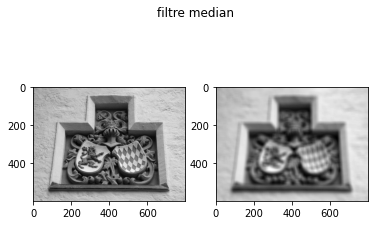

In [ ]:

# methode 1
median_fil = cv2.medianBlur(image2, 19)# il faut qu'il soit impaire
# methode 2
kernel = np.ones((20, 20), np.float32) / 400
median_fil2 = cv2.filter2D(image2, -1, kernel)
[Mh, Nh] = np.shape(kernel)
[Mx, Nx] = np.shape(median_fil2)
centre = [np.round(np.divide([Mh, Nh], 2))]

fig2, (ax21, ax22) = plt.subplots(1, 2)
fig2.suptitle('filtre median')
ax21.imshow(image2,cmap="gray")
ax22.imshow(median_fil2,cmap="gray")
plt.show()

Visualiser la transformée de Fourier de 𝒊_𝒊𝒅𝒆𝒂𝒍(𝒙, 𝒚), de 𝒊(𝒙, 𝒚) et de 𝒉(𝒙, 𝒚).

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


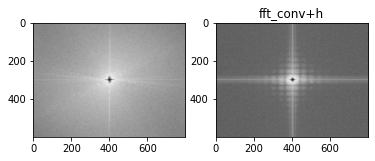

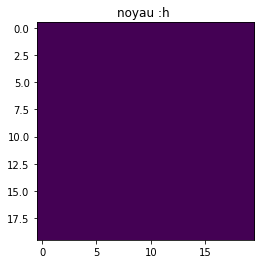

In [ ]:

f_ideal = np.fft.fft2(image2)
f_n_ideal = np.fft.fft2(median_fil2)
h = np.fft.fft2(kernel)
fshift_ideal = np.fft.fftshift(f_ideal)
fshift_n_ideal = np.fft.fftshift(f_n_ideal)
fshift_h = np.fft.fftshift(h)
magnitude_spectrum_ideal = 20 * np.log(np.abs(fshift_ideal))
magnitude_spectrum_ideal = np.asarray(magnitude_spectrum_ideal, dtype=np.uint8)

magnitude_spectrum_n_ideal = 20*np.log(np.abs(fshift_n_ideal))
magnitude_spectrum_n_ideal = np.asarray(magnitude_spectrum_n_ideal,dtype=np.uint8)

magnitude_spectrum_h = 20*np.log(np.abs(fshift_h))

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(magnitude_spectrum_ideal, cmap = 'gray')
plt.title('fft ideal')
ax2.imshow(magnitude_spectrum_n_ideal, cmap = 'gray')
plt.title('fft_conv+h')
plt.show()
plt.figure
plt.imshow(np.iscomplex(h))
plt.title('noyau :h ')
plt.show()

Une méthode naïve de retrouver 𝒊_𝒊𝒅𝒆𝒂𝒍(𝒙, 𝒚), serait d’obtenir sa transformée de Fourier par :
𝑰(𝒖,𝒗)
𝑯(𝒖,𝒗). Mettez cette méthode en oeuvre et commenter le résultat.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


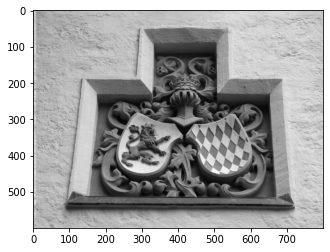

In [ ]:
 #---reconstruction
im_dd = signal.convolve2d(image2, kernel, mode='same', boundary='wrap')
Hf = np.zeros(image2.shape)#padding
Hf[:h.shape[0],:h.shape[1]] = h

H = np.fft.fft2(np.roll(Hf,shift=9))
im_ideal=np.real(np.fft.ifft2(np.multiply(H,np.fft.fft2(image2))))
plt.imshow(im_ideal,cmap = 'gray')
plt.show()

In [ ]:
#generation du bruit
im_vec = np.ravel(image2)
RSB= 20;# en dB
mu = im_vec**2.

P_i= np.sum(mu) / (image2.shape[0] * image2.shape[1])
Pb = P_i/(10**(RSB/10))
b = np.sqrt(Pb) * np.random.randn(image2.shape[0] , image2.shape[1])
img_b = image2 + b
lambd = 100000
x_est = np.real(np.fft.ifft2(np.divide(np.multiply(np.conjugate(H),np.fft.fft2(img_b)) , np.add((np.multiply(np.conjugate(H),H),lambd*np.ones(np.size(img_b)))))))
W = signal.wiener(i)

# **3.Tomographic reconstruction**

In [ ]:

from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale ,iradon

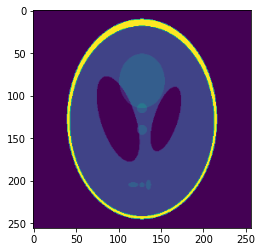

In [ ]:
image = shepp_logan_phantom()
image = rescale(image, scale=0.64, mode='reflect', multichannel=False)
plt.imshow(image)      

In [ ]:
np.shape(image)

(256, 256)

In [ ]:
def radon(image,teta,rho) :
  im_rot=sp.misc.imrotate(image,teta)
  x=np.linspace(0., 180., max(image.shape), endpoint=False)
  y = x
  d=x*np.cos(teta)+y*np.sin(teta)-ro
  for i in range(teta):
    if ((d-image)!= 0):
    M_proj.append(d)

  return M_proj


IndentationError: ignored

/usr/local/lib/python3.6/dist-packages/skimage/transform/radon_transform.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  coords = np.array(np.ogrid[:image.shape[0], :image.shape[1]])


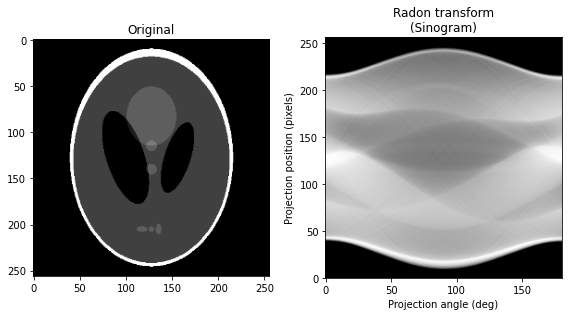

In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(image, cmap=plt.cm.Greys_r)

theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta, circle=True)
dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]

ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')

fig.tight_layout()
plt.show()

FBP rms reconstruction error: 0.0283


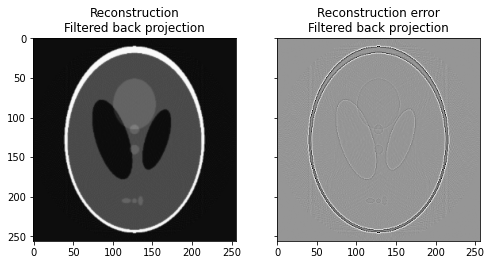

In [ ]:
reconstruction_fbp = iradon(sinogram, theta=theta, circle=True)
error = reconstruction_fbp - image
print(f"FBP rms reconstruction error: {np.sqrt(np.mean(error**2)):.3g}")

imkwargs = dict(vmin=-0.2, vmax=0.2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5),
                               sharex=True, sharey=True)
ax1.set_title("Reconstruction\nFiltered back projection")
ax1.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
ax2.set_title("Reconstruction error\nFiltered back projection")
ax2.imshow(reconstruction_fbp - image, cmap=plt.cm.Greys_r, **imkwargs)
plt.show()